# Exploração de Dados de preços de Diamantes 



##### Summary

- *price:*  Preço em dólares americanos
- *carat:*  Peso do diamante
- *cut:*  Qualidade do corte (razoável, bom, muito bom, premium, ideal)
- *color* Cor do diamante, de J (pior) a D (melhor)
- *clarity:* Uma medida de quão claro é o diamante (I1 (pior), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (melhor))
- *x:* Comprimento em mm
- *y:* Largura em mm
- *z:* Profundidade em mm
- *depth:* Porcentagem de profundidade total = z / média (x, y) = 2 * z / (x + y)
- *table:* Largura do topo do diamante em relação ao ponto mais largo


#### Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
%matplotlib inline

#### Importando e Preparando dados

In [2]:
DATA_DIR = '../data'
FILE_NAME = 'diamonds.csv'
data_path = os.path.join(DATA_DIR, FILE_NAME)
diamonds = pd.read_csv(data_path)
diamonds.shape

(53940, 10)

In [3]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [5]:
diamonds['price']= diamonds['price'].astype(float) 

In [6]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.539635
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.703869
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


- O valor máximo da **carat** coluna é 5.0 parece um pouco alto considerando o percentil 75, que é próximo de 1,0, e o desvio padrão (0,47), o valor máximo é superior a oito desvios padrão do percentil 75, o que é definitivamente uma grande diferença ou seja, um Outlier.
- O diamante mais barato que observamos é aquele com um preço de 326 dólares, o preço médio é de quase 4.000 dólares, e o diamante mais caro tem um preço de 18.823 dólares; esse preço poderia ser um valor atípico?


#### Verificando valores de **X** que são iguais a zero:

In [7]:
diamonds.loc[diamonds['x']== 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954.0,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139.0,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381.0,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800.0,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686.0,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034.0,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130.0,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130.0,0.0,0.00,0.0


- Alguns dos diamantes com valor zero em x também possuem zeros nas outras dimensões. Embora o valor real seja zero, faz mais sentido considerá-los como valores faltantes

In [8]:
diamonds=diamonds.loc[(diamonds['x']>0) | (diamonds['y']>0)]
diamonds.loc[11182]

carat        1.07
cut         Ideal
color           F
clarity       SI2
depth        61.6
table        56.0
price      4954.0
x             0.0
y            6.62
z             0.0
Name: 11182, dtype: object

In [9]:
diamonds.loc[11182,'x']=diamonds['x'].median()

In [10]:
diamonds.loc[diamonds['x']==0].shape

(0, 10)

In [11]:
diamonds.loc[diamonds['y']==0]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [12]:
diamonds.loc[11182, 'z'] = diamonds['z'].median()

In [13]:
diamonds.loc[(diamonds['y'] > 30) | (diamonds['z'] > 30)]

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,Premium,H,SI2,58.9,57.0,12210.0,8.09,58.90,8.06
48410,0.51,Very Good,E,VS1,61.8,54.7,1970.0,5.12,5.15,31.80
49189,0.51,Ideal,E,VS1,61.8,55.0,2075.0,5.15,31.80,5.12


In [14]:
diamonds = diamonds.loc[~((diamonds['y'] > 30) | (diamonds['z'] > 30))]

In [15]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000
mean,0.797873,61.749384,57.457107,3932.072353,5.731985,5.733812,3.539523
std,0.473965,1.432488,2.234057,3988.634982,1.119639,1.111498,0.691687
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.250000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,10.540000,6.980000


In [16]:
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity', drop_first=True)], axis=1)

## EDA Univariada

In [17]:
#Criando listas com os nomes dos recursos
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

In [18]:
#Criando uma função para calcular as estatisticas descritivas de todas as caracteristicas numericas
def desc_num_features(feature_name, bins=30,edgecolor='k',**kwargs):
    fig, ax = plt.subplots(figsize=(8,4))
    diamonds[feature_name].hist(bins=bins, edgecolor=edgecolor, ax=ax, **kwargs)
    ax.set_title(feature_name,size=15)
    plt.figtext(1,0.15, str(diamonds[feature_name].describe().round(2).astype(str)),size=17)

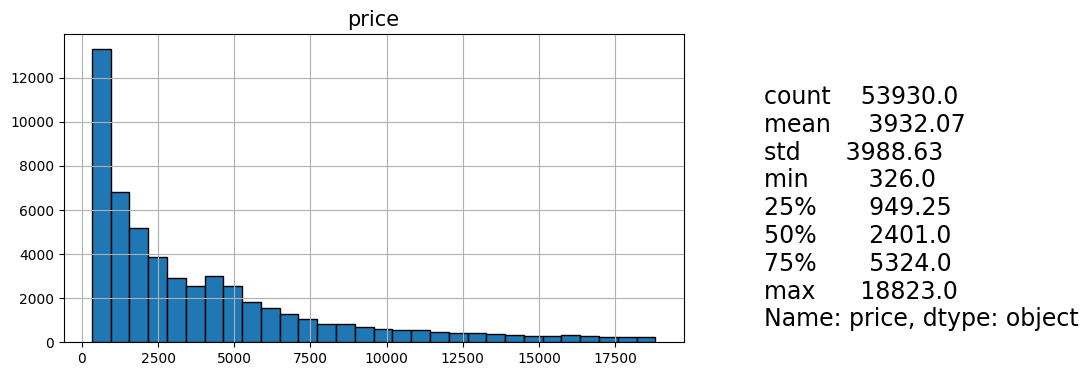

In [19]:
desc_num_features('price')

- O histograma criado possui 30 compartimentos, entao o tamanho de cada compartimento é aproximadamente:

$$
\Large
bin\_size \approx \frac{18823 - 326}{30} \approx 615
$$
